In [1]:
import sys
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()

In [3]:
DIR = './vision/'

In [4]:
def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0: bsize = bsize - 1
    if bsize < 3: bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


src = cv2.imread(DIR + 'sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


## 이진화

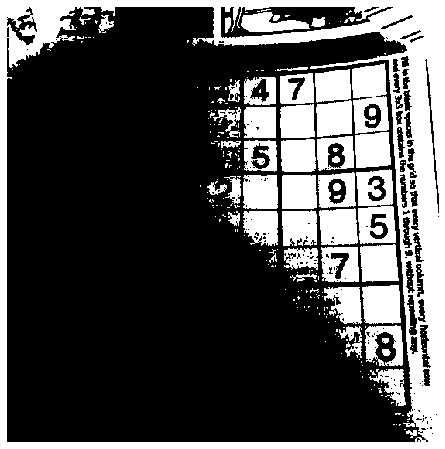

In [5]:
img = cv2.imread(DIR + 'sudoku.jpg',0)

_, binary = cv2.threshold(img, 127,255,cv2.THRESH_BINARY)

imshow("", binary)

97.0


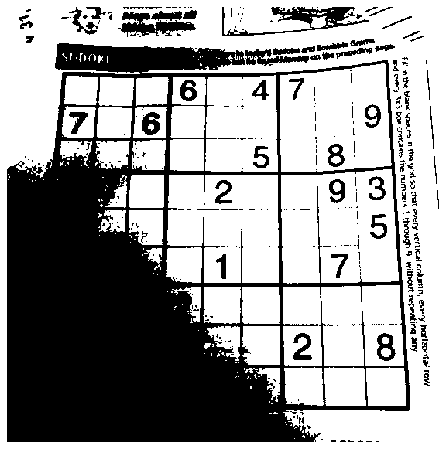

In [6]:
img = cv2.imread(DIR + 'sudoku.jpg',0)

t, binary2 = cv2.threshold(img, 127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

print(t)
imshow("", binary2)

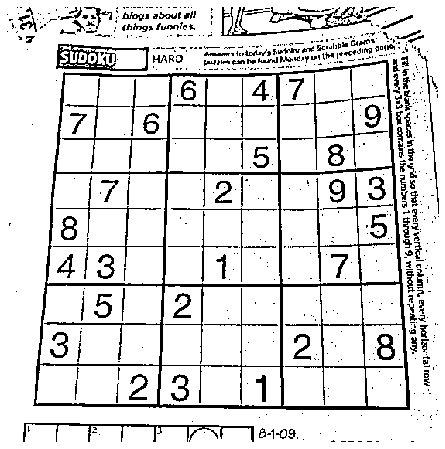

In [7]:
img = cv2.imread(DIR + 'sudoku.jpg',0)

binary3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,5)

imshow("", binary3)

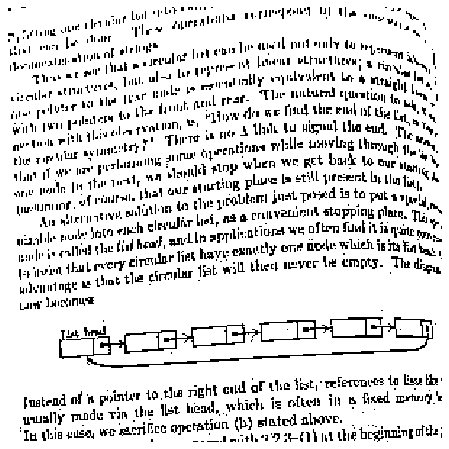

In [8]:
img = cv2.imread(DIR + 'text.jpg',0)

binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,8)

imshow("", binary)

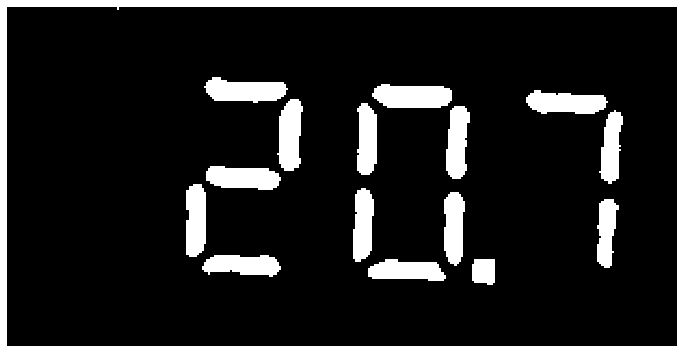

In [9]:
img = cv2.imread(DIR + '207.png',0)
dst = cv2.GaussianBlur(img, (13,13), 0.0)
binary = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21,6)
imshow("", binary)

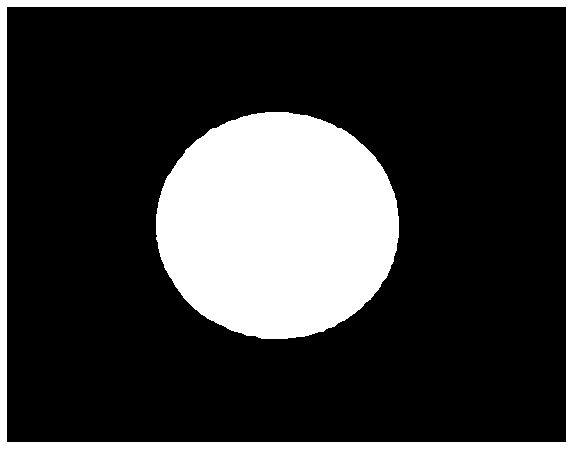

In [10]:
img = cv2.imread(DIR + 'circle.png',0)
dst = cv2.GaussianBlur(img, (7,7), 1.5)
_, binary = cv2.threshold(dst, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
imshow("",binary)

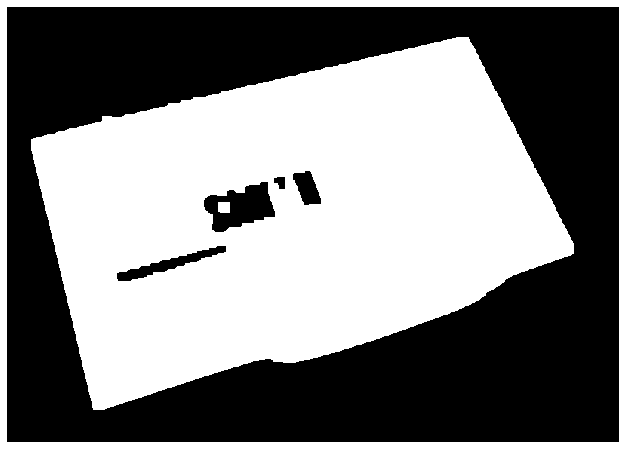

In [11]:
img = cv2.imread(DIR + 'namecard.png',0)
gray = cv2.GaussianBlur(img, (7, 7), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |  cv2.THRESH_OTSU)
open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
closed = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=1)

imshow("", closed )

## 배경 제거

In [12]:
cap = cv2.VideoCapture(DIR + "car-overhead-1.avi") 

fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('mask',fgmask)
    cv2.imshow('src',frame)

    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

### 2-패스 알고리즘

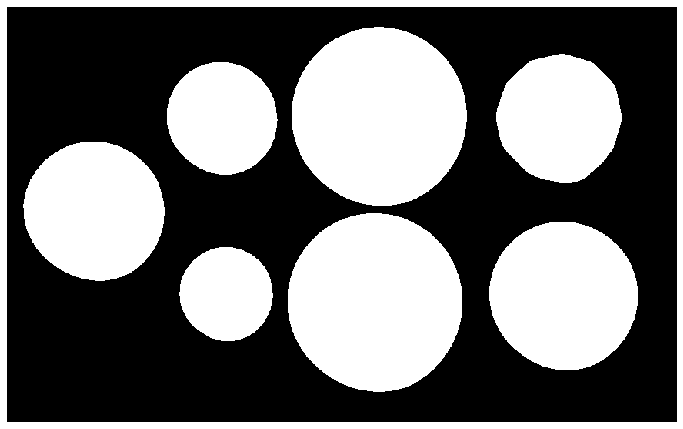

In [27]:
img  = cv2.imread(DIR + "coins2.png", 0)

dst = cv2.GaussianBlur(img, (9,9), 0.0)
_, img_edge = cv2.threshold(dst, 128, 255, cv2.THRESH_BINARY_INV| cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(img_edge, cv2.MORPH_CLOSE, kernel, iterations=1)

imshow("", closed)

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(closed, connectivity=8)

In [28]:
print(nb_components)
print(centroids)
print(output.shape)
print(stats.shape)
print(stats[0])

8
[[415.59172572 272.98755472]
 [483.64470094 142.61475865]
 [717.59112595 144.95333969]
 [279.37589557 145.10534305]
 [113.30252133 265.4809066 ]
 [478.26509929 384.03323416]
 [723.4565277  375.42152359]
 [284.78519731 373.30363605]]
(540, 871)
(8, 5)
[     0      0    871    540 283481]


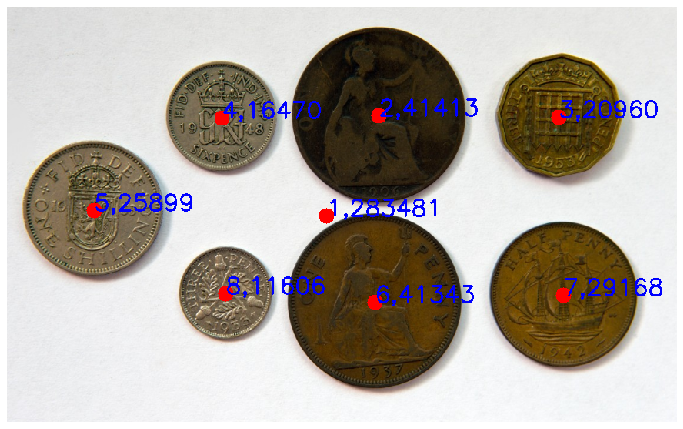

In [30]:
img  = cv2.imread(DIR + "coins2.png")
font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX

i =1
for c in centroids :    
    cv2.circle(img, (int(c[0]), int(c[1])), 10, (0,0,255), -1)
    cv2.putText(img, f"{i},{stats[i-1][4]}", (int(c[0]),int(c[1])), font, 1.0,(255,0,0),2)
    i += 1

imshow("", img)    

## 영상 특징 추출

### 허프 변환

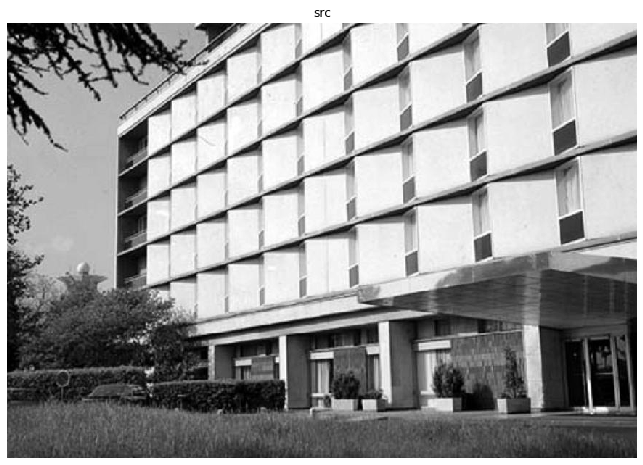

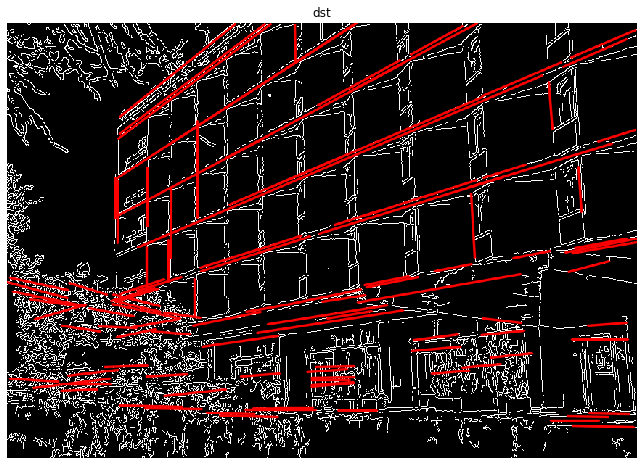

True

In [5]:
import math
src = cv2.imread(DIR + 'building.jpg', cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(src, 50, 150)
lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 160, minLineLength=50, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst)
cv2.imwrite(DIR + 'output.png', dst)

In [35]:
print(type(lines))
print(lines.shape) # 113: 선 개수
print(lines[0,0,:]) # 첫번째 선에 대한 좌표 -> (180,309) ~ (737,72)

<class 'numpy.ndarray'>
(113, 1, 4)
[180 309 737  72]


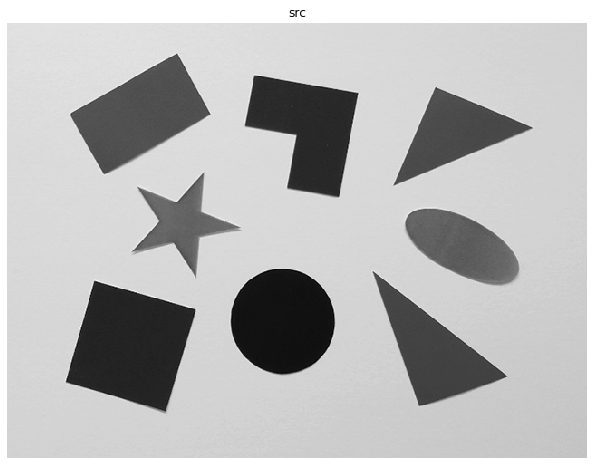

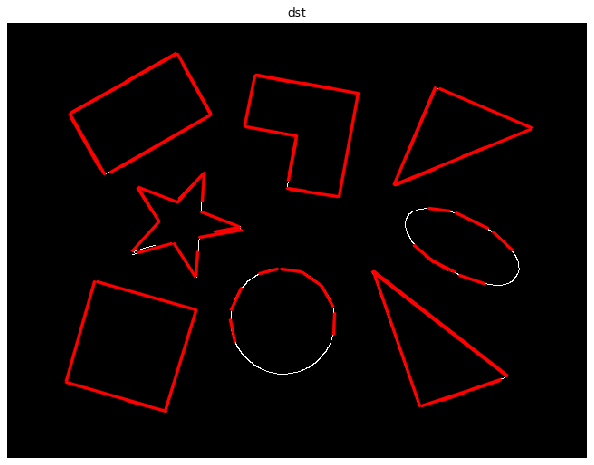

In [45]:
src = cv2.imread(DIR + 'polygon.bmp', cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(src, 50, 150)
lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 10, minLineLength=20, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst)

### Lane detection

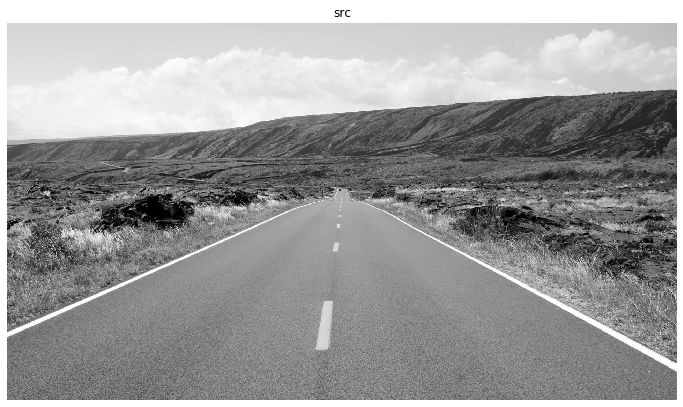

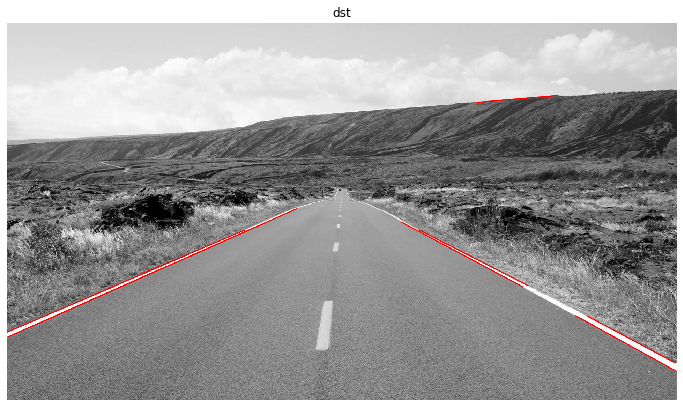

In [57]:
src = cv2.imread(DIR + 'lane.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.GaussianBlur(src, (11,11), 0.0)
edge = cv2.Canny(dst, 60, 150)
lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 50, minLineLength=200, maxLineGap=5)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst)